In [0]:
import pandas as pd
from google.colab import files

train_file = "https://raw.githubusercontent.com/danielcaraway/COVID19/master/WK4_0413/train.csv"
train = pd.read_csv(train_file)

## JUST LOOKING AT CALIFORNIA

In [10]:
## Just looking at CA
ca = train[train['Province_State'] == 'California']
ca['Date'] = pd.to_datetime(ca['Date'])
ca = ca[ca['ConfirmedCases'] > 0 ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
ca

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ds
19810,27523,California,US,2020-03-10,144.0,2.0,2020-03-10
19811,27524,California,US,2020-03-11,177.0,3.0,2020-03-11
19812,27525,California,US,2020-03-12,221.0,4.0,2020-03-12
19813,27526,California,US,2020-03-13,282.0,4.0,2020-03-13
19814,27527,California,US,2020-03-14,340.0,5.0,2020-03-14
19815,27528,California,US,2020-03-15,426.0,6.0,2020-03-15
19816,27529,California,US,2020-03-16,557.0,7.0,2020-03-16
19817,27530,California,US,2020-03-17,698.0,12.0,2020-03-17
19818,27531,California,US,2020-03-18,751.0,13.0,2020-03-18
19819,27532,California,US,2020-03-19,952.0,18.0,2020-03-19


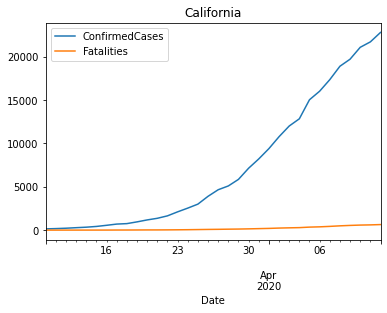

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

ca.plot(x="Date", y=["ConfirmedCases", "Fatalities"])
plt.title('California')
plt.show()

## CALIFORNIA + PROPHET

++ Heading back to WEEK ONE



In [12]:
from fbprophet import Prophet 
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/ca_train.csv')
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


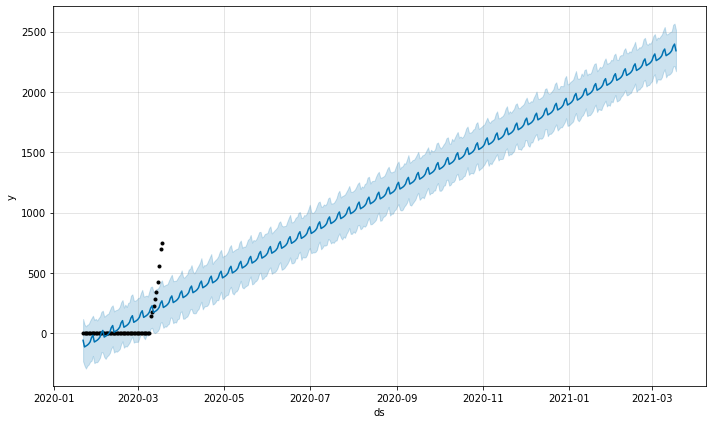

In [13]:
sm = df[['Date', 'ConfirmedCases']]
sm.columns = ['ds','y']
m = Prophet()
m.fit(sm)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)

fig1 = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


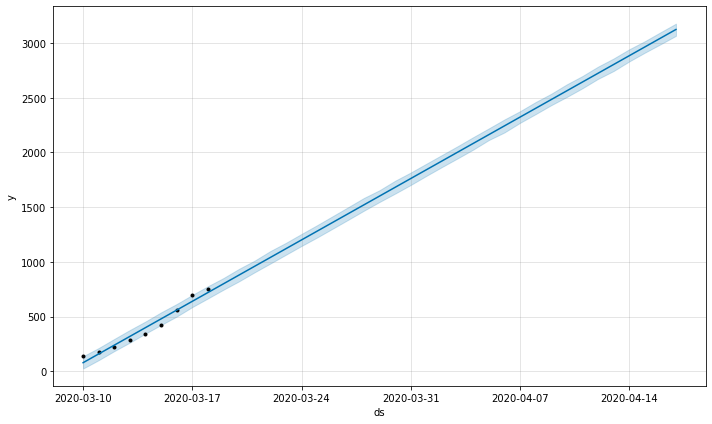

In [19]:
df = df[df['ConfirmedCases'] > 0]
sm = df[['Date', 'ConfirmedCases']]
sm.columns = ['ds','y']
m = Prophet()
m.fit(sm)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [28]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-10,79.223423,25.618567,138.026576,79.223423,79.223423,0.0,0.0,0.0,0.0,0.0,0.0,79.223423
1,2020-03-11,159.323325,102.371433,213.228246,159.323325,159.323325,0.0,0.0,0.0,0.0,0.0,0.0,159.323325
2,2020-03-12,239.423227,185.210339,296.219647,239.423227,239.423227,0.0,0.0,0.0,0.0,0.0,0.0,239.423227
3,2020-03-13,319.523130,262.933860,377.954821,319.523130,319.523130,0.0,0.0,0.0,0.0,0.0,0.0,319.523130
4,2020-03-14,399.637257,345.261322,455.485276,399.637257,399.637257,0.0,0.0,0.0,0.0,0.0,0.0,399.637257


In [0]:
ca['ds'] = ca['Date']


In [26]:
m1 = forecast.copy()
m2 = ca.copy()
df_merged = pd.merge(m1, m2, how='left', on='ds', suffixes=('_v1', '_v2'))
df_merged.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,2020-03-10,79.223423,25.618567,138.026576,79.223423,79.223423,0.0,0.0,0.0,0.0,0.0,0.0,79.223423,27523.0,California,US,2020-03-10,144.0,2.0
1,2020-03-11,159.323325,102.371433,213.228246,159.323325,159.323325,0.0,0.0,0.0,0.0,0.0,0.0,159.323325,27524.0,California,US,2020-03-11,177.0,3.0
2,2020-03-12,239.423227,185.210339,296.219647,239.423227,239.423227,0.0,0.0,0.0,0.0,0.0,0.0,239.423227,27525.0,California,US,2020-03-12,221.0,4.0
3,2020-03-13,319.523130,262.933860,377.954821,319.523130,319.523130,0.0,0.0,0.0,0.0,0.0,0.0,319.523130,27526.0,California,US,2020-03-13,282.0,4.0
4,2020-03-14,399.637257,345.261322,455.485276,399.637257,399.637257,0.0,0.0,0.0,0.0,0.0,0.0,399.637257,27527.0,California,US,2020-03-14,340.0,5.0


In [0]:
sm_merge = df_merged[['ds','yhat_lower', 'yhat_upper', 'yhat', 'ConfirmedCases']]

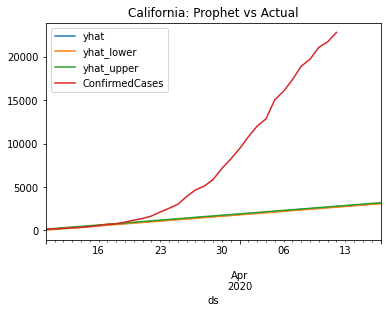

In [38]:
sm_merge.plot(x="ds", y=["yhat", "yhat_lower", "yhat_upper", "ConfirmedCases"])
plt.title('California: Prophet vs Actual')
plt.show()

## The ACTUAL Confirmed is so great, yhat + lower and upper all look like the same line. Woof.